# Heritability estimate on subtype from wm activation maps

##### Subtype:
- Niak preprocessed WM task (new scrub method)
- 5 subtype
- **FD_scrubbed_mean regressed out befor building subtypes**

##### Heritability:
- Regress "FD_scrubbed_mean" "Age_in_Yrs" "Gender" as covariate


## Build Pheno file

### Merge behavioral variables with subtypes weights

In [3]:
# Import pandas
import os
import pandas as pd
import numpy as np
from IPython.display import display
import time

In [4]:
%matplotlib inline
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [5]:
task_name = 'wm'

In [6]:
# Set up the paths 
path_root = "/home/yassinebha/Drive/HCP/"
net_path = os.path.join(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_WM_18-Jun-2017/networks/")
out_path = os.path.join(path_root,"Solar_heritability/HCP_subtype/")

In [7]:
# Set up files name
sbt_name_pattern = "sbt_weights_net_{}.csv"
pheno_path = os.path.join(path_root,"subtypes_scores/26-10-2016/pheno/hcp_pheno_{}_raw.csv".format(task_name))
solar_script = 'fcd_solar_h2r_test.sh'
pheno_save = 'solar_wm_spm_pheno.csv'.format(task_name)
pedig_save = 'solar_wm_spm_pedigre.csv'.format(task_name)
solar_out = 'subtype_5_{}_{}'.format(task_name,time.strftime("%d-%m-%Y"))
h2r_out_file = 'h2r_solar_{}_spm_{}.csv'
## Solar covariates
solar_cov = '    cov FD_scrubbed_mean Gender'

In [8]:
# List of network names
list_trial = os.listdir(net_path)
list_trial

['tools',
 'contrast_2bk_vs_0bk',
 'contrast_faces_vs_places',
 'contrast_tools_vs_places',
 '0bk',
 'faces',
 'body',
 'contrast_body_vs_places',
 'places',
 '2bk']

In [9]:
# Loop over each network and build weight file
for index, trial_name in enumerate(list_trial):
    file_path = os.path.join(net_path, trial_name, sbt_name_pattern.format(trial_name))
    if not os.path.exists(file_path):
        print("Hello, {} does not exist".format(file_path))
    
    tmp_weights = pd.read_csv(file_path)
    # Rename first column
    tmp_weights.rename(columns={" ":"Subject"}, inplace=True)
    tmp_weights.Subject = tmp_weights.Subject.str.strip(" ")
    
    rename_dict = dict()
    for colname in tmp_weights.columns:
        if colname == "Subject":
            continue
        else:
            new_name = "{}_{}".format(trial_name, colname)
            # Get rid of trailing whitespace
            new_name = new_name.strip(" ")
            rename_dict[colname] = new_name

    tmp_weights.rename(columns=rename_dict, inplace=True)
    
    if index==0:
        dataframe = tmp_weights
    else:
        dataframe = pd.merge(dataframe, tmp_weights, on="Subject", how="inner")

In [10]:
dataframe.head()

,Subject,tools_sub1,tools_sub2,tools_sub3,tools_sub4,tools_sub5,contrast_2bk_vs_0bk_sub1,contrast_2bk_vs_0bk_sub2,contrast_2bk_vs_0bk_sub3,contrast_2bk_vs_0bk_sub4,...,places_sub1,places_sub2,places_sub3,places_sub4,places_sub5,2bk_sub1,2bk_sub2,2bk_sub3,2bk_sub4,2bk_sub5
0,HCP100206,-0.099,0.072,0.137,-0.130,-0.023,-0.189,-0.263,0.163,-0.323,...,0.080,-0.086,0.080,-0.057,0.081,0.349,0.157,0.389,-0.312,-0.356
1,HCP100307,0.689,-0.654,-0.656,0.235,0.532,-0.379,0.131,-0.092,-0.391,...,-0.706,0.706,-0.705,0.548,-0.597,-0.684,-0.428,-0.695,0.681,0.570
2,HCP100408,-0.772,0.789,0.688,-0.196,-0.680,0.656,-0.136,0.163,0.688,...,0.885,-0.844,0.865,-0.730,0.683,0.757,0.410,0.738,-0.724,-0.630
3,HCP100610,0.528,-0.526,-0.527,0.243,0.428,-0.473,0.238,-0.409,-0.366,...,-0.459,0.472,-0.476,0.385,-0.437,0.530,0.179,0.558,-0.483,-0.478
4,HCP101006,0.191,-0.218,-0.219,0.092,0.217,0.442,-0.230,0.154,0.477,...,-0.232,0.235,-0.229,0.149,-0.171,-0.300,-0.156,-0.328,0.239,0.357


In [11]:
dataframe.Subject.describe()

count           808
unique          808
top       HCP151425
freq              1
Name: Subject, dtype: object

In [12]:
# Load pheno file
file_weight = dataframe
file_pheno = pd.read_csv(pheno_path)

In [13]:
file_pheno.head()

,Unnamed: 0,FD_RL,FD_scrubbed_RL,FD_LR,FD_scrubbed_LR,FD_scrubbed_mean,FD_mean,Subject,Age_in_Yrs,Gender,...,BMI,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9
0,HCP100206,0.083342,0.083342,0.082368,0.082368,0.082855,0.082855,HCP100206,27.0,1.0,...,26.64,-1.143794,1.304835,1.285918,-0.034336,0.205086,0.053396,0.090798,-0.512524,-0.118881
1,HCP100307,0.095924,0.095924,0.093332,0.093332,0.094628,0.094628,HCP100307,27.0,2.0,...,22.96,-0.528411,0.493464,0.523816,-0.600763,0.386336,-0.953060,-0.958070,-0.143309,-0.722473
2,HCP100408,0.133898,0.129641,0.150610,0.139477,0.134559,0.142254,HCP100408,33.0,1.0,...,27.75,-0.236296,0.020266,0.092588,0.114286,-0.084017,-0.522003,0.619392,0.219196,1.037169
3,HCP100610,0.155579,0.155579,0.143473,0.143473,0.149526,0.149526,HCP100610,27.0,1.0,...,36.91,2.022214,0.895451,-0.361691,1.234488,0.709151,-0.882736,-0.323026,-0.199254,0.459399
4,HCP101006,0.111923,0.111923,0.133317,0.133317,0.122620,0.122620,HCP101006,35.0,2.0,...,30.27,0.591952,-1.191472,0.037988,-0.682910,-0.516141,0.056823,-0.275139,-0.310782,0.308365


In [14]:
file_pheno.Subject.describe()

count           825
unique          825
top       HCP151425
freq              1
Name: Subject, dtype: object

In [15]:
# Select a subset of variable
file_pheno_subset = file_pheno[["Subject","Age_in_Yrs","Handedness","Gender","BMI","FD_mean","FD_scrubbed_mean"]]
file_pheno_subset.head()

,Subject,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,27.0,65.0,1.0,26.64,0.082855,0.082855
1,HCP100307,27.0,95.0,2.0,22.96,0.094628,0.094628
2,HCP100408,33.0,55.0,1.0,27.75,0.142254,0.134559
3,HCP100610,27.0,85.0,1.0,36.91,0.149526,0.149526
4,HCP101006,35.0,90.0,2.0,30.27,0.122620,0.122620


In [16]:
# Replace gender M=1 and F=2
#file_pheno_subset.Gender.replace({'M':1,'F':2}, inplace=True)
#file_pheno_subset.head()

In [17]:
file_pheno_subset[["Subject"]].describe()

,Subject
count,825
unique,825
top,HCP151425
freq,1


In [18]:
file_weight[["Subject"]].describe()

,Subject
count,808
unique,808
top,HCP151425
freq,1


In [19]:
# Merge weight with subset of pheno variables
merged_weight_pheno = pd.merge(file_weight, file_pheno_subset, on='Subject', how='left')
# Replace 'Subject' by 'ID'
merged_weight_pheno.rename(columns={'Subject':'ID'},inplace=True)
merged_weight_pheno.head()

,ID,tools_sub1,tools_sub2,tools_sub3,tools_sub4,tools_sub5,contrast_2bk_vs_0bk_sub1,contrast_2bk_vs_0bk_sub2,contrast_2bk_vs_0bk_sub3,contrast_2bk_vs_0bk_sub4,...,2bk_sub2,2bk_sub3,2bk_sub4,2bk_sub5,Age_in_Yrs,Handedness,Gender,BMI,FD_mean,FD_scrubbed_mean
0,HCP100206,-0.099,0.072,0.137,-0.130,-0.023,-0.189,-0.263,0.163,-0.323,...,0.157,0.389,-0.312,-0.356,27.0,65.0,1.0,26.64,0.082855,0.082855
1,HCP100307,0.689,-0.654,-0.656,0.235,0.532,-0.379,0.131,-0.092,-0.391,...,-0.428,-0.695,0.681,0.570,27.0,95.0,2.0,22.96,0.094628,0.094628
2,HCP100408,-0.772,0.789,0.688,-0.196,-0.680,0.656,-0.136,0.163,0.688,...,0.410,0.738,-0.724,-0.630,33.0,55.0,1.0,27.75,0.142254,0.134559
3,HCP100610,0.528,-0.526,-0.527,0.243,0.428,-0.473,0.238,-0.409,-0.366,...,0.179,0.558,-0.483,-0.478,27.0,85.0,1.0,36.91,0.149526,0.149526
4,HCP101006,0.191,-0.218,-0.219,0.092,0.217,0.442,-0.230,0.154,0.477,...,-0.156,-0.328,0.239,0.357,35.0,90.0,2.0,30.27,0.122620,0.122620


In [20]:
merged_weight_pheno.ID.describe()

count           808
unique          808
top       HCP151425
freq              1
Name: ID, dtype: object

In [21]:
# Check if there is empty value in BMI
sum(merged_weight_pheno.BMI.isnull())

0

In [22]:
# Save the merged file
merged_weight_pheno.to_csv(os.path.join(out_path,pheno_save), index=False)

In [23]:
os.path.join(out_path,pheno_save)

'/home/yassinebha/Drive/HCP/Solar_heritability/HCP_subtype/solar_wm_spm_pheno.csv'

## Build trait file

In [24]:
## build trait file
# Remove not neaded traits
list_trait = merged_weight_pheno.columns.tolist()
new_list = [trait for trait in list_trait if trait not in ['ID','Age_in_Yrs','Gender']]
new_list

['tools_sub1',
 'tools_sub2',
 'tools_sub3',
 'tools_sub4',
 'tools_sub5',
 'contrast_2bk_vs_0bk_sub1',
 'contrast_2bk_vs_0bk_sub2',
 'contrast_2bk_vs_0bk_sub3',
 'contrast_2bk_vs_0bk_sub4',
 'contrast_2bk_vs_0bk_sub5',
 'contrast_faces_vs_places_sub1',
 'contrast_faces_vs_places_sub2',
 'contrast_faces_vs_places_sub3',
 'contrast_faces_vs_places_sub4',
 'contrast_faces_vs_places_sub5',
 'contrast_tools_vs_places_sub1',
 'contrast_tools_vs_places_sub2',
 'contrast_tools_vs_places_sub3',
 'contrast_tools_vs_places_sub4',
 'contrast_tools_vs_places_sub5',
 '0bk_sub1',
 '0bk_sub2',
 '0bk_sub3',
 '0bk_sub4',
 '0bk_sub5',
 'faces_sub1',
 'faces_sub2',
 'faces_sub3',
 'faces_sub4',
 'faces_sub5',
 'body_sub1',
 'body_sub2',
 'body_sub3',
 'body_sub4',
 'body_sub5',
 'contrast_body_vs_places_sub1',
 'contrast_body_vs_places_sub2',
 'contrast_body_vs_places_sub3',
 'contrast_body_vs_places_sub4',
 'contrast_body_vs_places_sub5',
 'places_sub1',
 'places_sub2',
 'places_sub3',
 'places_sub4',
 

In [25]:
# Save trait file
file_out = open(os.path.join(out_path,"trait_file"), 'w')
for item in new_list:
    file_out.write("%s\n" % item)
file_out.close()

## Build Pedigree file

In [26]:
# Select a subset of variable from pheno file
file_pheno_pedig = file_pheno[["Subject","Twin_Stat","Zygosity","Mother_ID","Gender"]]
file_pheno_pedig.head()

,Subject,Twin_Stat,Zygosity,Mother_ID,Gender
0,HCP100206,NotTwin,NotTwin,56037.0,1.0
1,HCP100307,Twin,NotMZ,51488.0,2.0
2,HCP100408,Twin,MZ,51730.0,1.0
3,HCP100610,Twin,NotMZ,52813.0,1.0
4,HCP101006,Twin,MZ,51283.0,2.0


In [27]:
file_pheno_pedig.Subject.describe()

count           825
unique          825
top       HCP151425
freq              1
Name: Subject, dtype: object

In [28]:
# Build pedigre : ID , mo, fo, hhID, mztwins,sex
mother_id = ["mo_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
father_id = ["fa_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
household_id = ["hh_{}".format(row.Mother_ID) for ind, row in file_pheno_pedig.iterrows()]
twin_id = ["pair_{}".format(row.Mother_ID) if row.Zygosity == "MZ" else "" for ind, row in file_pheno_pedig.iterrows()]

In [29]:
# write into new data frame
df_pedig = pd.DataFrame()
df_pedig["ID"] = file_pheno_pedig.Subject
df_pedig["fa"] = father_id
df_pedig["mo"] = mother_id
df_pedig["sex"] = file_pheno_pedig.Gender.astype(int)
df_pedig["mztwin"] = twin_id
df_pedig["hhID"] = household_id


print("head")
display(df_pedig.head())
print("tail")
display(df_pedig.tail())
df_pedig.count()

head


,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037.0,mo_56037.0,1,,hh_56037.0
1,HCP100307,fa_51488.0,mo_51488.0,2,,hh_51488.0
2,HCP100408,fa_51730.0,mo_51730.0,1,pair_51730.0,hh_51730.0
3,HCP100610,fa_52813.0,mo_52813.0,1,,hh_52813.0
4,HCP101006,fa_51283.0,mo_51283.0,2,pair_51283.0,hh_51283.0


tail


,ID,fa,mo,sex,mztwin,hhID
820,HCP992673,fa_56143.0,mo_56143.0,2,,hh_56143.0
821,HCP992774,fa_51345.0,mo_51345.0,1,,hh_51345.0
822,HCP993675,fa_55800.0,mo_55800.0,2,,hh_55800.0
823,HCP994273,fa_52364.0,mo_52364.0,1,,hh_52364.0
824,HCP996782,fa_51541.0,mo_51541.0,2,,hh_51541.0


ID        825
fa        825
mo        825
sex       825
mztwin    825
hhID      825
dtype: int64

In [30]:
# Look for MZ twins missing their co-twin
uniques = list(df_pedig.mztwin.unique())
uniques.pop(0)
twin_counts = [np.sum(df_pedig.mztwin==twin) for twin in uniques]
#for idx, twin in enumerate(uniques):
    #print("{} occurs {} times".format(twin, twin_counts[idx]))

In [31]:
# create a mask that will kepp only MZ twins missing their co-twin
singles = [True if np.sum(df_pedig.mztwin==row.mztwin)==1 else False for ind, row in df_pedig.iterrows()]

In [32]:
# Make a copy of the pedigre to avoid missing up with the original data
copy_df_pedig = df_pedig.copy()

In [33]:
# Select only MZ twins missing their co-twin
df_single_pedig = copy_df_pedig[singles]

# Add "M_" (for missing) to a the single MZ twins
for i, row in df_single_pedig.iterrows():
    df_single_pedig.set_value(i,"ID","M_{}".format(row.ID))
display(df_single_pedig.head())
df_single_pedig.count()

,ID,fa,mo,sex,mztwin,hhID
37,M_HCP110007,fa_54572.0,mo_54572.0,2,pair_54572.0,hh_54572.0
57,M_HCP114823,fa_52925.0,mo_52925.0,2,pair_52925.0,hh_52925.0
84,M_HCP121820,fa_51421.0,mo_51421.0,2,pair_51421.0,hh_51421.0
86,M_HCP122317,fa_51802.0,mo_51802.0,1,pair_51802.0,hh_51802.0
92,M_HCP123824,fa_56022.0,mo_56022.0,1,pair_56022.0,hh_56022.0


ID        37
fa        37
mo        37
sex       37
mztwin    37
hhID      37
dtype: int64

In [34]:
# Append pedgree with fake co-twin for the missing one
df_pedig_final = copy_df_pedig.append(df_single_pedig)
df_pedig_final.head()

,ID,fa,mo,sex,mztwin,hhID
0,HCP100206,fa_56037.0,mo_56037.0,1,,hh_56037.0
1,HCP100307,fa_51488.0,mo_51488.0,2,,hh_51488.0
2,HCP100408,fa_51730.0,mo_51730.0,1,pair_51730.0,hh_51730.0
3,HCP100610,fa_52813.0,mo_52813.0,1,,hh_52813.0
4,HCP101006,fa_51283.0,mo_51283.0,2,pair_51283.0,hh_51283.0


In [35]:
df_pedig_final.tail()

,ID,fa,mo,sex,mztwin,hhID
692,M_HCP727553,fa_51561.0,mo_51561.0,2,pair_51561.0,hh_51561.0
715,M_HCP769064,fa_52803.0,mo_52803.0,1,pair_52803.0,hh_52803.0
743,M_HCP835657,fa_52137.0,mo_52137.0,2,pair_52137.0,hh_52137.0
787,M_HCP904044,fa_51290.0,mo_51290.0,2,pair_51290.0,hh_51290.0
812,M_HCP972566,fa_56077.0,mo_56077.0,2,pair_56077.0,hh_56077.0


In [36]:
df_pedig_final.count()

ID        862
fa        862
mo        862
sex       862
mztwin    862
hhID      862
dtype: int64

In [37]:
# Save the pedigree file
df_pedig_final.to_csv(os.path.join(out_path,pedig_save), index=False)

## Run SOLAR heritability estimate 

In [38]:
%%bash -s "$out_path" "$solar_cov" "$solar_script" 
cd $1 #cd to out_path
#sufix=$(echo $2 | sed -e 's/ /_/g') # add a suffix of covariate
sed -i "104s/.*/$2/" $3 # feed the covariate to solar script
sed -i "52s~.*~$1phi2.gz~" $3 # put the right path for the simlink
sed -i "53s~.*~$1pedindex.out~" $3
sed -i "54s~.*~$1pedindex.cde~" $3
sed -i "55s~.*~$1se_univ_polygen.tcl~" $3

In [39]:
%%bash -s "$out_path" "$pedig_save"
cd $1
solar <<INTERNAL_SOLAR_SCRIPT  
load pedi $2
pedigree classes -full
INTERNAL_SOLAR_SCRIPT


SOLAR Eclipse version 8.1.1 (General), last updated on December 10, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Unloading current pedigree data ...
Loading pedigree data from the file solar_wm_spm_pedigre.csv ...
::::::::::::::
mibdrel.tab
::::::::::::::

    NPairs  Relationship
  ========  ===========================================
      1604  Self
       119  Identical sib pair
      1724  Parent-offspring
       611  Siblings
       371  Unrelated



In [40]:
%%bash -s "$out_path" "$pheno_save" "$solar_out"
cd $1
#if [ ! -d $3 ]; then
#   mkdir $3
#fi
solar <<INTERNAL_SOLAR_SCRIPT 
load pheno $2
INTERNAL_SOLAR_SCRIPT
bash fcd_solar_h2r_test.sh trait_file $3 $1$2
for i in $3/Set-*; do bash $i/run_all.sh ; done


SOLAR Eclipse version 8.1.1 (General), last updated on December 10, 2016
Copyright (c) 1995-2016 Texas Biomedical Research Institute
Enter help for help, exit to exit, doc to browse documentation.

Creating output directories...
00053 : Set-53 : FD_scrubbed_mean                                                  
All done.


## Results

In [41]:
out_herit = pd.read_csv(os.path.join(out_path,solar_out,"se_out.out"),sep="\t",header=None)
out_herit_df =  pd.DataFrame()

data = pd.DataFrame({"Trait": out_herit[2],"H2r": out_herit[4],"P": out_herit[7],"CovVarianceExpl": out_herit[9]})
out_herit_df = data[["Trait","H2r","P","CovVarianceExpl"]].sort_values(['Trait'], ascending=[True]).reset_index(drop=True)
out_herit_df

,Trait,H2r,P,CovVarianceExpl
0,0bk_sub1_norm,0.289162,1.340000e-05,0.002409
1,0bk_sub2_norm,0.529588,3.312296e-18,0.010085
2,0bk_sub3_norm,0.454543,4.263009e-13,0.009053
3,0bk_sub4_norm,0.471236,5.343320e-14,0.004018
4,0bk_sub5_norm,0.538028,9.184153e-19,0.012755
5,2bk_sub1_norm,0.574015,2.263836e-21,0.008352
6,2bk_sub2_norm,0.556625,2.405795e-19,0.003008
7,2bk_sub3_norm,0.572223,1.813344e-21,0.011332
8,2bk_sub4_norm,0.575713,2.338004e-21,0.005016
9,2bk_sub5_norm,0.567728,2.731581e-20,0.014142


In [42]:
# remove unwanted Variables
out_herit_df_clean = out_herit_df[~out_herit_df['Trait'].str.strip().isin(['BMI_norm','FD_mean_norm','FD_scrubbed_mean_norm'])]

In [43]:
# FDR
from statsmodels.sandbox.stats import multicomp as smi
pcorr_vec = smi.multipletests(out_herit_df_clean['P'], alpha=0.05, method='fdr_bh')
out_herit_df_clean.insert(3,'FDR',pcorr_vec[1])
out_herit_df_clean.insert(4,'FDR_log10',-np.log10(pcorr_vec[1]))

In [44]:
out_herit_df_clean

,Trait,H2r,P,FDR,FDR_log10,CovVarianceExpl
0,0bk_sub1_norm,0.289162,1.340000e-05,1.675000e-05,4.775985,0.002409
1,0bk_sub2_norm,0.529588,3.312296e-18,8.716568e-18,17.059654,0.010085
2,0bk_sub3_norm,0.454543,4.263009e-13,7.105015e-13,12.148435,0.009053
3,0bk_sub4_norm,0.471236,5.343320e-14,9.895038e-14,13.004583,0.004018
4,0bk_sub5_norm,0.538028,9.184153e-19,2.870048e-18,17.542111,0.012755
5,2bk_sub1_norm,0.574015,2.263836e-21,1.298891e-20,19.886427,0.008352
6,2bk_sub2_norm,0.556625,2.405795e-19,8.019315e-19,18.095863,0.003008
7,2bk_sub3_norm,0.572223,1.813344e-21,1.295246e-20,19.887648,0.011332
8,2bk_sub4_norm,0.575713,2.338004e-21,1.298891e-20,19.886427,0.005016
9,2bk_sub5_norm,0.567728,2.731581e-20,1.050608e-19,18.978559,0.014142


In [45]:
# Loop over trait and create heritability table for radar plot
#drop_list = ['BMI','FD_mean','FD_scrubbed_mean','Handedness']
#list_new = [x for x in new_list if x not in drop_list ]

In [46]:
## Loop over trait and create heritability table for radar plot
#list_trial = [xx.replace('-','_') for xx in list_trial]
for trait_herit in list_trial:
    mask_df = [x[:-10] == trait_herit for x in out_herit_df_clean.Trait.str.strip()]
    out_herit_select = out_herit_df_clean[['Trait','H2r']][mask_df]
    # extract trial
    column_net = [''.join(row['Trait'].split('_')[0:-2]) for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Trial'] = column_net
    # extract subtype
    column_subt = [row['Trait'].split('_')[-2].strip() for ind,row in out_herit_select[['Trait']].iterrows()]
    out_herit_select.loc[:,'Subt'] = column_subt
    out_herit_clean = out_herit_select[['Trial','Subt','H2r']]
    # Pivot table
    out_herit_final = out_herit_clean.pivot(index='Trial',columns='Subt',values='H2r')
    out_herit_final.index.name=None
    out_herit_final.to_csv(os.path.join(out_path,solar_out,h2r_out_file.format(task_name,trait_herit)))

In [47]:
out_herit_final

Subt,sub1,sub2,sub3,sub4,sub5
2bk,0.574015,0.556625,0.572223,0.575713,0.567728


In [48]:
##### R section #########

In [49]:
# first on terminal install cairo : "sudo apt install libcairo2-dev"
# devtools::install_github("hadley/svglite")
# devtools::install_github("ricardo-bion/ggradar", dependencies=TRUE)
import warnings
warnings.filterwarnings('ignore')

In [50]:
%%R
library(ggradar)
suppressPackageStartupMessages(library(dplyr))
library(scales)
require("ggplot2")

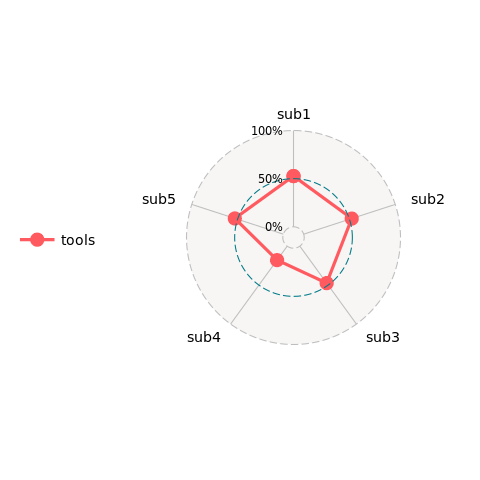

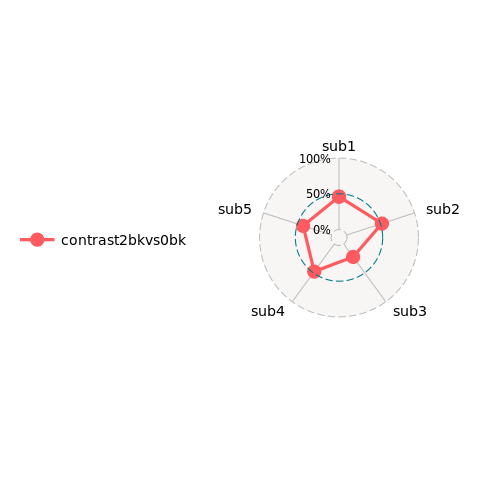

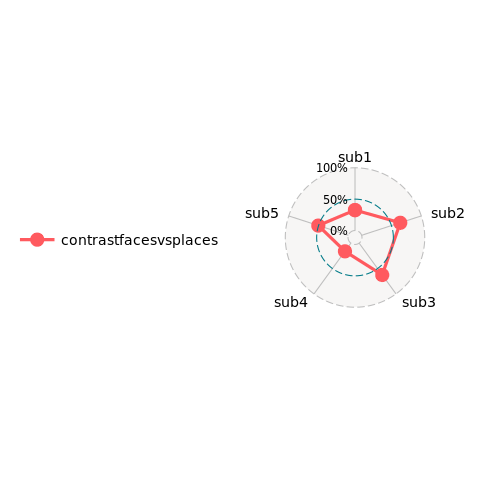

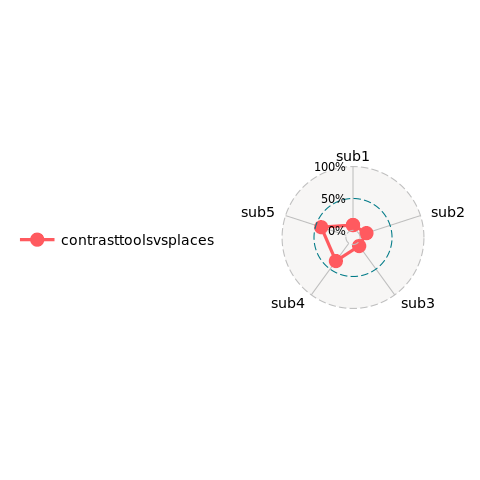

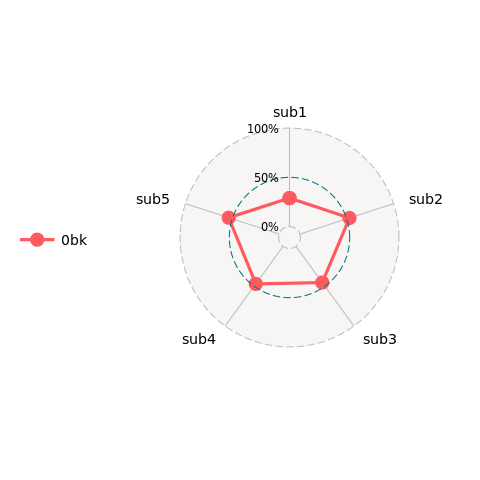

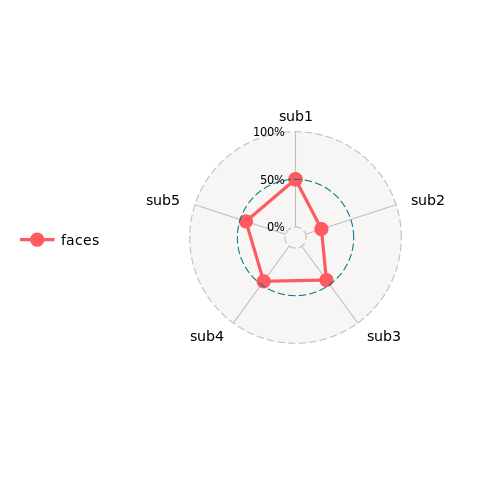

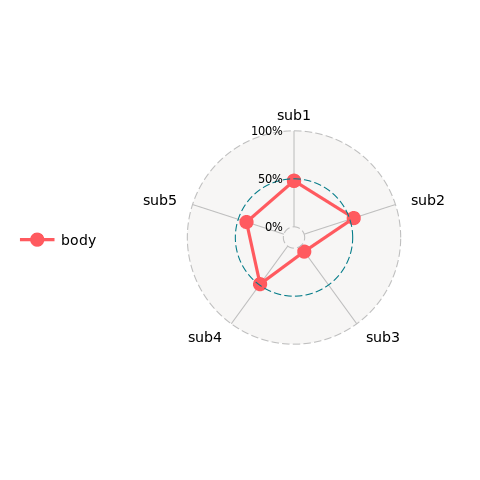

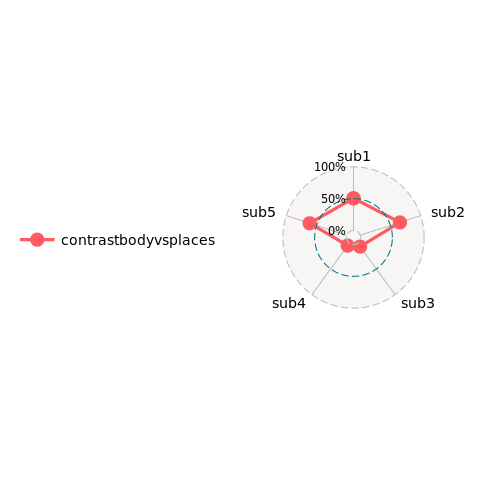

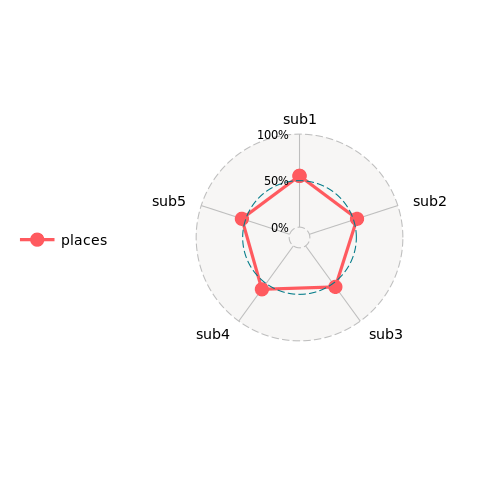

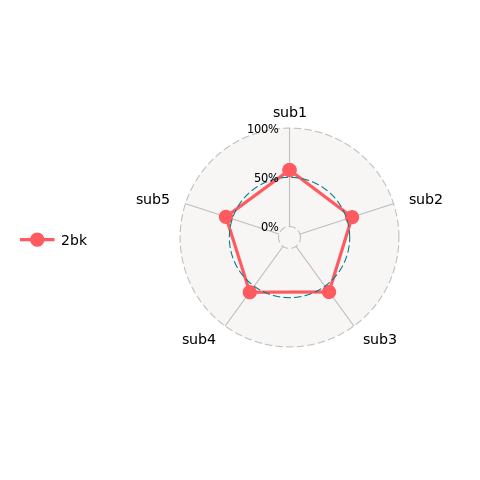

In [51]:
%%R -i out_path,solar_out,task_name,list_trial,path_root
for (ii in list_trial) {
    MyData <- read.csv(file=paste(out_path,solar_out,"/h2r_solar_",task_name,'_spm_',ii,'.csv',sep = ''))
    # plot radar 
    image=ggradar(MyData, grid.min = 0,
                  grid.mid = 0.5, grid.max = 1, axis.label.size = 5, grid.label.size = 5 ,legend.text.size =5) +
    theme(legend.text = element_text(size = 14))
    ggsave(file=paste(path_root,"subtypes_scores/26-10-2016/subtype_5_spm_WM_18-Jun-2017/" ,ii,"_heritability.svg",sep = ''), plot=image, width=10, height=8)
    print(image)
    }